In [1]:
import catboost
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def _generate_data(n=100, std=0.1):
    eps = std * np.random.randn(n)
    x = np.random.rand(n) * 2*np.pi
    y = np.sin(x) + eps
    return x, y


def generate_data(n=100, std=0.1):
    x1, y1 = _generate_data(n=n, std=std)
    x2, y2 = _generate_data(n=n, std=std)
    y2 = -y2
    return np.concatenate([x1, x2]).reshape(-1, 1), np.concatenate([y1, y2])

In [3]:
x, y = generate_data(std=0.01)

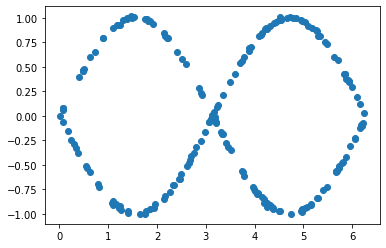

In [4]:
plt.scatter(x, y)
plt.show()

In [5]:
model = catboost.CatBoostRegressor(
    loss_function='RMSEWithUncertainty'
)

In [6]:
model.fit(x, y)

0:	learn: 1.0519074	total: 47ms	remaining: 46.9s
1:	learn: 1.0410216	total: 48.1ms	remaining: 24s
2:	learn: 1.0320172	total: 48.9ms	remaining: 16.3s
3:	learn: 1.0241136	total: 49.7ms	remaining: 12.4s
4:	learn: 1.0161417	total: 50.5ms	remaining: 10s
5:	learn: 1.0115755	total: 51.4ms	remaining: 8.51s
6:	learn: 1.0034041	total: 52.1ms	remaining: 7.39s
7:	learn: 0.9958036	total: 52.8ms	remaining: 6.55s
8:	learn: 0.9912015	total: 53.6ms	remaining: 5.9s
9:	learn: 0.9848077	total: 54.3ms	remaining: 5.38s
10:	learn: 0.9775906	total: 54.7ms	remaining: 4.92s
11:	learn: 0.9709387	total: 55.1ms	remaining: 4.54s
12:	learn: 0.9644766	total: 55.5ms	remaining: 4.21s
13:	learn: 0.9597216	total: 55.9ms	remaining: 3.94s
14:	learn: 0.9528726	total: 56.3ms	remaining: 3.69s
15:	learn: 0.9465931	total: 56.7ms	remaining: 3.48s
16:	learn: 0.9409704	total: 57.1ms	remaining: 3.3s
17:	learn: 0.9359516	total: 57.4ms	remaining: 3.13s
18:	learn: 0.9308120	total: 57.8ms	remaining: 2.98s
19:	learn: 0.9250465	total: 58

464:	learn: 0.4452841	total: 228ms	remaining: 263ms
465:	learn: 0.4447362	total: 229ms	remaining: 262ms
466:	learn: 0.4441917	total: 229ms	remaining: 262ms
467:	learn: 0.4431777	total: 230ms	remaining: 261ms
468:	learn: 0.4428068	total: 230ms	remaining: 261ms
469:	learn: 0.4421016	total: 231ms	remaining: 260ms
470:	learn: 0.4411267	total: 231ms	remaining: 259ms
471:	learn: 0.4399624	total: 231ms	remaining: 259ms
472:	learn: 0.4394952	total: 232ms	remaining: 258ms
473:	learn: 0.4387559	total: 232ms	remaining: 258ms
474:	learn: 0.4382643	total: 232ms	remaining: 257ms
475:	learn: 0.4370061	total: 233ms	remaining: 256ms
476:	learn: 0.4364930	total: 233ms	remaining: 256ms
477:	learn: 0.4357313	total: 234ms	remaining: 255ms
478:	learn: 0.4354211	total: 234ms	remaining: 255ms
479:	learn: 0.4348588	total: 234ms	remaining: 254ms
480:	learn: 0.4342208	total: 235ms	remaining: 253ms
481:	learn: 0.4333099	total: 235ms	remaining: 253ms
482:	learn: 0.4323411	total: 236ms	remaining: 252ms
483:	learn: 

931:	learn: 0.2152708	total: 411ms	remaining: 30ms
932:	learn: 0.2151829	total: 411ms	remaining: 29.5ms
933:	learn: 0.2147048	total: 411ms	remaining: 29.1ms
934:	learn: 0.2140090	total: 412ms	remaining: 28.6ms
935:	learn: 0.2135829	total: 412ms	remaining: 28.2ms
936:	learn: 0.2137374	total: 413ms	remaining: 27.7ms
937:	learn: 0.2131502	total: 413ms	remaining: 27.3ms
938:	learn: 0.2128539	total: 413ms	remaining: 26.9ms
939:	learn: 0.2130093	total: 414ms	remaining: 26.4ms
940:	learn: 0.2123494	total: 414ms	remaining: 26ms
941:	learn: 0.2118325	total: 415ms	remaining: 25.5ms
942:	learn: 0.2112716	total: 415ms	remaining: 25.1ms
943:	learn: 0.2107203	total: 415ms	remaining: 24.6ms
944:	learn: 0.2102792	total: 416ms	remaining: 24.2ms
945:	learn: 0.2093203	total: 416ms	remaining: 23.8ms
946:	learn: 0.2091287	total: 417ms	remaining: 23.3ms
947:	learn: 0.2086849	total: 417ms	remaining: 22.9ms
948:	learn: 0.2080092	total: 417ms	remaining: 22.4ms
949:	learn: 0.2083093	total: 418ms	remaining: 22ms

In [7]:
x_sort = np.sort(x)

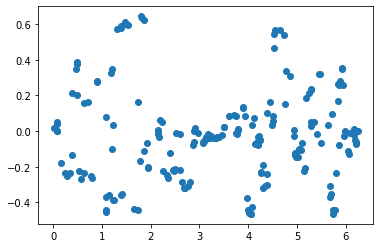

In [8]:
y_hat = model.predict(x_sort)

plt.scatter(x_sort, y_hat[:, 0])
plt.show()

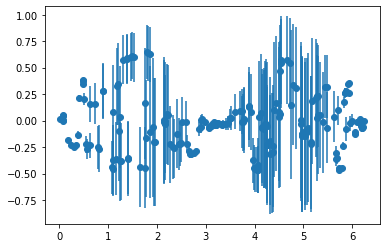

In [9]:
y_params = model.predict(x_sort)

plt.errorbar(x_sort, y_params[:, 0], yerr=y_params[:, 1], fmt='o')
plt.show()